In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


난수 생성  
tf.random.uniform함수를 통해 균일분포 난수 생성  
-균일 분포 : 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는다.  
-tf.random.uniform( [뽑을 개수], 최솟값, 최댓값)  
  
tf.random.normal을 사용하면 정규 분포의 난수를 구할 수 있다.

In [2]:
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.12663877], shape=(1,), dtype=float32)


In [3]:
rand =  tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.08690854  0.30219328 -0.86705184 -0.08854068], shape=(4,), dtype=float32)


# 뉴런 만들기
## 입력 X, rkwndcl w, 활성화 함수 f, 출력 Y
## 활성화 함수 ( sigmod, ReLU)

### 1. Sigmod
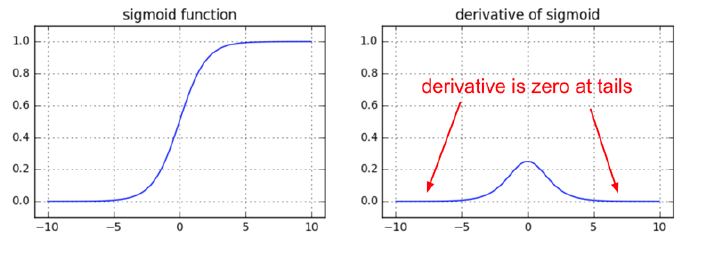
- 결과값이 [0,1] 사이로 제한됨

- 뇌의 뉴런과 유사하여 많이 쓰였음

- 문제점

   (1) 그라디언트가 죽는 현상이 발생한다 (Gradient vanishing 문제)

    gradient 0이 곱해 지니까 그다음 layer로 전파되지 않는다. 즉, 학습이 되지 않는다.

   (2) 활성함수의 결과 값의 중심이 0이 아닌 0.5이다.

  (3) 계산이 복잡하다 (지수함수 계산)
- Gradient Vanishing

- 시그모이드와 같이 결과값이 포화(saturated)되는 함수는 gradient vanishing 현상을 야기

- 이전 레이어로 전파되는 그라디언트가 0에 가까워 지는 현상

- 레이어를 깊게 쌓으면 파라미터의 업데이트가 제대로 이루어지지 않음

- 양 극단의 미분값이 0에 가깝기 때문에 발생하는 문제  

### 2. ReLU
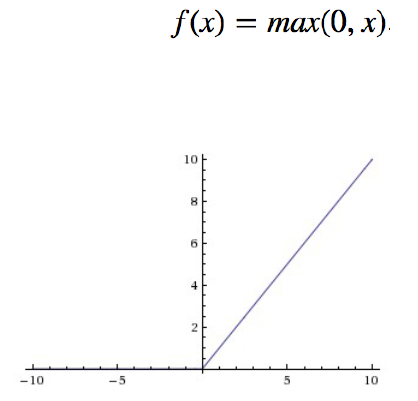  
- 장점

    (1) 양 극단값이 포화되지 않는다. (양수 지역은 선형적)

    (2) 계산이 매우 효율적이다 (최대값 연산 1개)

    (3) 수렴속도가 시그모이드류 함수대비 6배 정도 빠르다.

- 단점

    (1) 중심값이 0이 아님 (마이너한 문제)

    (2) 입력값이 음수인 경우 항상 0을 출력함 (마찬가지로 파라미터 업데이트가 안됨)


===> 시그모이드는 출력값을 0~1사이로만 제한하지만 ReLU는 양수를 그대로 반환하기 때문에 값의 왜곡이 적어진다!!!

### 오늘은 AND,OR,XOR연산을 다룰 것!! 출력을 0~1로 제한하는 것이 적합하기에 SIGMOD사용할 것이당

In [4]:
import math
def sigmod(x):
    return 1/(1+math.exp(-x))

In [5]:
x = 1
y = 0 
w = tf.random.normal([1],0,1)
output = sigmod(x * w)
print(output)

0.3653875295858908


출력 0.6420646688453964은 기대출력 0과의 차이  
여기서 뉴런은 결국 w값인데, 경사하강법을 이용해서 w를 변화시켜서 차이를 줄여보자!!  
* 경사하강법  
 w =w + X * a * error  
 여기서 a는 학습률!! 학습률은 w을 업데이트 하는 정도, 큰 값으로 설정하면 학습이 빨리되지만 과도 학습으로 적정 수치 벗어날 수도 있음  
 

In [6]:
for i in range(1000):
    output = sigmod(x*w)
    error = y - output
    w = w + x*0.1*error
    
    if i % 100 == 0:
        print(i,error,output)

0 -0.3653875295858908 0.3653875295858908
100 -0.09048737933452579 0.09048737933452579
200 -0.048963785202297536 0.048963785202297536
300 -0.033288538587565766 0.033288538587565766
400 -0.025147365674332452 0.025147365674332452
500 -0.020181032960017956 0.020181032960017956
600 -0.01684173185951701 0.01684173185951701
700 -0.014445001121037164 0.014445001121037164
800 -0.012642299811831742 0.012642299811831742
900 -0.011237692008725873 0.011237692008725873


### ===> 짜잔~~~ for문 반복할 수록 error 줄어드는 거 확인!!
근데 만약에 입력이 0이면 w = w + x*0.1*error는 항상 0값을 가지 때문에 경사하강법이 효과가 없어진다!!  
이런 경우를 방지하기 위해 뉴런에 편향을 넣어준다!!  
### 즉, 활성화 함수 sigmod를 y=f(x*w + 1*b)  ....여기서 b가 편향...으로 바꾸어준다

In [7]:
x = 0
y = 1 
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmod(x*w + 1*b)
    error = y - output
    w = w + x*0.1*error
    b = b + 1*0.1*error
    
    if i % 100 == 0:
        print(i,error,output)

0 0.8058400533956693 0.1941599466043306
100 0.1254780360398572 0.8745219639601428
200 0.05825267107905774 0.9417473289209423
300 0.03741920605773574 0.9625807939422643
400 0.027457534226092428 0.9725424657739076
500 0.021650544569305152 0.9783494554306948
600 0.01785671471596928 0.9821432852840307
700 0.015187251474030439 0.9848127485259696
800 0.01320829559620329 0.9867917044037967
900 0.011683364631432602 0.9883166353685674


# 1. AND  
입력 2개 => [1,1], [1,0], [0,1], [0,0] 경우 4개  
출력 => [1], [0], [0], [0]

In [8]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)  #입력이 2개니까 각각의 가중치 w 2개 필요
b = tf.random.normal([1],0,1)

for i in range(2000):
    error_sum=0
    for j in range(4):
        output = sigmod(np.sum(x[j]*w) + 1*b)
        error = y[j][0] - output
        w = w + x[j]*0.1*error
        b = b + 1*0.1*error
        error_sum += error
    
    if i % 200 == 199:
        print(i,error_sum)

199 -0.11823110828685686
399 -0.06840617831355081
599 -0.04804169593263908
799 -0.03691003555766069
999 -0.02990875767837118
1199 -0.025110291438417007
1399 -0.021620969117665447
1599 -0.0189738550999995
1799 -0.01689584842206683
1999 -0.015225191010886843


### AND 네트워크 평가
### y 값과 output값이 얼마나 유사한지 평가

In [9]:
for i in range(4):
    print('X: ', x[i], 'Y: ', y[i], 'OUTPUT: ', sigmod(np.sum(x[i]*w)+b))

X:  [1 1] Y:  [1] OUTPUT:  0.964456942858261
X:  [1 0] Y:  [0] OUTPUT:  0.025185068928069237
X:  [0 1] Y:  [0] OUTPUT:  0.02526302422926522
X:  [0 0] Y:  [0] OUTPUT:  2.4676290871017707e-05


# 2.OR 

In [10]:
# 결과 값 y만 다르게
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)  #입력이 2개니까 각각의 가중치 w 2개 필요
b = tf.random.normal([1],0,1)

for i in range(2000):
    error_sum=0
    for j in range(4):
        output = sigmod(np.sum(x[j]*w) + 1*b)
        error = y[j][0] - output
        w = w + x[j]*0.1*error
        b = b + 1*0.1*error
        error_sum += error
    
    if i % 200 == 199:
            print(i,error_sum)

199 -0.046906424552933035
399 -0.025139071551089437
599 -0.017056365991180406
799 -0.012862792623751548
999 -0.010306214796015373
1199 -0.008588864831492932
1399 -0.007357273161365398
1599 -0.006431702940112201
1799 -0.005711970858366184
1999 -0.005134567869639294


### OR 네트워크 평가
### y 값과 output값이 얼마나 유사한지 평가

In [11]:
for i in range(4):
    print('X: ', x[i], 'Y: ', y[i], 'OUTPUT: ', sigmod(np.sum(x[i]*w)+b))

X:  [1 1] Y:  [1] OUTPUT:  0.9999972300976169
X:  [1 0] Y:  [1] OUTPUT:  0.9898202573943076
X:  [0 1] Y:  [1] OUTPUT:  0.9897952812921764
X:  [0 0] Y:  [0] OUTPUT:  0.02545832698049116


# 3.XOR 

In [12]:
# 결과 값 y만 다르게
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)  #입력이 2개니까 각각의 가중치 w 2개 필요
b = tf.random.normal([1],0,1)

for i in range(2000):
    error_sum=0
    for j in range(4):
        output = sigmod(np.sum(x[j]*w) + 1*b)
        error = y[j][0] - output
        w = w + x[j]*0.1*error
        b = b + 1*0.1*error
        error_sum += error
    
    if i % 200 == 199:
            print(i,error_sum)

199 -0.008538660115429364
399 -0.0003472830480687472
599 -1.4111395829630169e-05
799 -5.686640786040087e-07
999 5.584263496061226e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


### XOR 네트워크 평가
### y 값과 output값이 얼마나 유사한지 평가

In [13]:
for i in range(4):
    print('X: ', x[i], 'Y: ', y[i], 'OUTPUT: ', sigmod(np.sum(x[i]*w)+b))

X:  [1 1] Y:  [0] OUTPUT:  0.5128176286712095
X:  [1 0] Y:  [1] OUTPUT:  0.5128176305326305
X:  [0 1] Y:  [1] OUTPUT:  0.4999999990686774
X:  [0 0] Y:  [0] OUTPUT:  0.5000000009313226


### OUTPUT이 0.5근처에서 머뭄.....

In [14]:
print(w)
print(b)

tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


위에 결과 처럼 w1에비해 w2가 -7.4505806e-09으ㄹ 너무 작은 값이여서 두번 재 입력 영향력이 작아짐  
b값도 마찬가지로 너무 작은 수여서 영향이 거의 없기 때문에 위와 같은 현상이 발생하는 것!!

## 여러개의 퍼셉트론을 사용하여 해결하기!!

In [15]:
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=2, activation='sigmoid',input_shape=(2,)),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Dense는 가장 기본적인 레이어로서, 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 레이어  


units는 레이어를 구성하는 뉴런의 수, 뉴런이 많을수록 레이어 성능은 좋아지지만 계산량이 많아지고 메모리도 많이 차지  

activation은 활성화 함수! 여기서는 두 레이어 모두 sigmoid함수 사용  

input_shape는 첫 번째 레이어에서만 정의, 입력의 차원 수가 어떻게 되는지를 정의, 입력 데이터 1개가 [1,0]처럼 2개의 입력을 받는 1차원 array이므로 1차원의 원소의 개수인 2를 명시해 (2,)라고 정의  



model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')은 model이 실제로 동작 할 수 있도록 준비하는 명령  
  
최적화 함수(optimizer)로 딥러닝 학습식 정의  

여기서 SGD 확률적 경사 하강법 사용.  

경사하강법은 가중치 업데이트시 미분을 통해 기울기 구한 다음 기울기가 낮은 쪽으로 업데이트 하겠다  

확률적은 전체를 한번에 계산 노노, 확률적으로 일부 샘플을 구해서 조금씩 나눠서 계산 하겠다.  

loss는 원하는 값 y와의 차이(error와 비슷한 개념) ,  

mse는 평균 제곱오차로 기대출력-실제출력 한 다음 제곱한 값을 평균  

﻿

### model.fit() 함수로 학습 시키기 , epochs는 반복 횟수, batch_size는 한번에 학습시키는 데이터수

In [ ]:
history = model.fit(x,y,epochs=2000,batch_size=5)

### 네트워크 평가 

In [25]:
model.predict(x)

array([[0.08087322],
       [0.8990977 ],
       [0.90050685],
       [0.09087113]], dtype=float32)

### 가중치, 편향 확인하기  
Kernel이 가중치, bias가 편향

In [26]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.029503 ,  5.568042 ],
       [ 5.2627416, -5.400999 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([2.560237 , 2.7835093], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-5.6645904],
       [-5.61945  ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([8.247434], dtype=float32)>


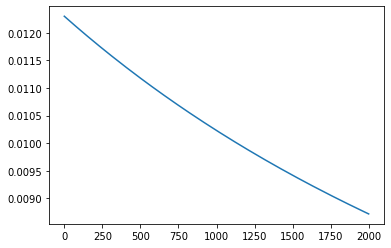

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])